#Daffa Rizki Rizaly - 2301931251

#Import Library

In [1]:
import os
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Dense

* **tensorflow** as a library of machine learning .
* **Keras** is an API for deep learning.
* **Sequential** is the type of model that keras used.
* **Conv2D** used to create a layer convulutional 2D. On this dataset , I use the 2D because the dataset is a 2D data
* **Flatten** used to change the 2dimensional be 1 linear vector.
* **Adam** is the optimizer that I use because it has the best performance.
* **Dropout** is used to drop a random neuron , is useful for avoiding overfitting
* **MaxPooling2D** is used for reducion feature's dimesion map without removing the important part
* **ImageDataGenerator** is used to Generate batches of tensor image data with real-time data augmentation.
* **Imread** to read the dataset
* **train_test_split** used for splitting the data into a validation set
* **StandardScaler** used for data normalization features for enhanced results.
* **Keras Dataset CIFAR** used to retrieve the dataset cifar
* **numpy** is used for array manipulation
* **matplolib.pyplot** to visualize data with graphs
* **confusion matrix and classification report** for model evaluation
* **itertools** to iterate

#Data Preprocessign

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


mount drive as my dataset is located in my drive

In [3]:
DOGS_DIR = os.listdir('/content/drive/MyDrive/dataset/catvsdog/Dog')
CATS_DIR = os.listdir('/content/drive/MyDrive/dataset/catvsdog/Cat')

Define the directory location for cats dand dog

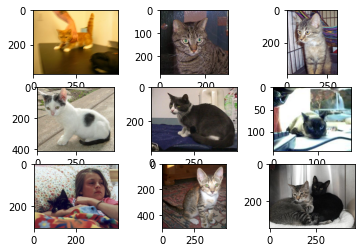

In [4]:
# define location of dataset
folder = '/content/drive/MyDrive/dataset/catvsdog/'
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'Cat/' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

printing the dataset to test if the directory is correct

In [5]:
'''
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(folder, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)
'''

'\nnum_skipped = 0\nfor folder_name in ("Cat", "Dog"):\n    folder_path = os.path.join(folder, folder_name)\n    for fname in os.listdir(folder_path):\n        fpath = os.path.join(folder_path, fname)\n        try:\n            fobj = open(fpath, "rb")\n            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)\n        finally:\n            fobj.close()\n\n        if not is_jfif:\n            num_skipped += 1\n            # Delete corrupted image\n            os.remove(fpath)\n\nprint("Deleted %d images" % num_skipped)\n'

Delete corrupted files and unreadable images

In [6]:
batch_size = 50  # max 1000 of these images can fit in gpu memory
new_img_size = (128,128)
input_shape = (128,128,3)
data_split = 0.3 
seed_value = 13

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    folder,
    validation_split=data_split,
    subset="training",
    seed=seed_value,
    image_size=new_img_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    folder,
    validation_split=data_split,
    subset="validation",
    seed=seed_value,
    image_size=new_img_size,
    batch_size=batch_size)


Found 23439 files belonging to 2 classes.
Using 16408 files for training.
Found 23439 files belonging to 2 classes.
Using 7031 files for validation.


using image_dataset_from directory to make training dataset and val dataset

In [7]:
model=Sequential()
with tf.device('/device:GPU:0'):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (128,128,3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation = "sigmoid"))

Building the model with 3 time conv2d with batch normalization , max pooling and droput followed by fully connected network with batch normalization and dropout

In [8]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Compiling the model using Adam as adam performs really well and loss binary_crossentropy because the output is a binary between 1 and 0

In [ ]:
model.summary()

In [9]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
)

Epoch 1/25
329/329 [==============================] - 2402s 7s/step - loss: 0.7079 - acc: 0.6261 - val_loss: 0.6096 - val_acc: 0.6783
Epoch 2/25
329/329 [==============================] - 69s 207ms/step - loss: 0.5819 - acc: 0.6902 - val_loss: 0.6153 - val_acc: 0.6838
Epoch 3/25
329/329 [==============================] - 68s 204ms/step - loss: 0.5300 - acc: 0.7331 - val_loss: 0.5805 - val_acc: 0.6912
Epoch 4/25
329/329 [==============================] - 68s 205ms/step - loss: 0.4868 - acc: 0.7647 - val_loss: 0.8872 - val_acc: 0.5790
Epoch 5/25
329/329 [==============================] - 67s 200ms/step - loss: 0.4516 - acc: 0.7843 - val_loss: 0.9645 - val_acc: 0.6134
Epoch 6/25
329/329 [==============================] - 59s 177ms/step - loss: 0.4132 - acc: 0.8086 - val_loss: 0.8448 - val_acc: 0.5844
Epoch 7/25
329/329 [==============================] - 43s 130ms/step - loss: 0.3866 - acc: 0.8247 - val_loss: 0.6734 - val_acc: 0.6733
Epoch 8/25
329/329 [==============================] - 45

after that i fit the model with the training dataset and using the validation dataset as validation.

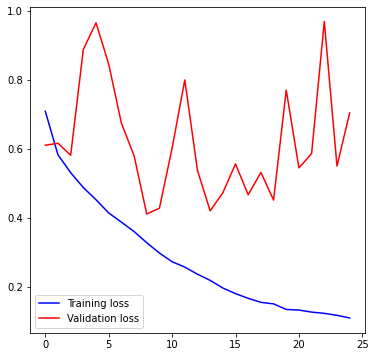

<Figure size 432x288 with 0 Axes>

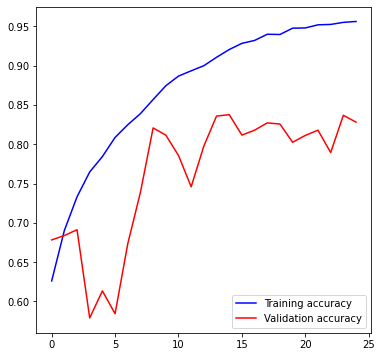

In [10]:

plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

As shown above, the result of training is good with no sudden incline or decline while the validation having the sudden incline and decline. The possible cause of this is images that is an outlier where it is not a dog or a cat

#Conclusion
B. For my custom CNN architecture, I created a CNN network with a convultional layer with maxpooling, batch normalization and dropout repeated for 3 times. Firstly the feature will go in a convolutional layer with relu and n filters with kernel size of 5x5 and relu activation function. after that the features go in the batch normalization where it will be normalize. This layer helps to speed up the training process and smoothen loss function. after that i maxpooling the features to produce reduce dimensionality of the input by using max filters. After that i dropout a random neuron to prevent overfitting. After that i repeated the convolution layer 3 times with 64,32,16 filters respeectively. After that for fully connected i  used 2 fully connected with another batch normalization between the fully connected network with sigmoid function as the final activation function with 1 output neuron.

C. The Result of the model has 95% accuracy and 0.1 loss for training and 84% validation accuracy and 0.7 validation loss. As show in the graph above, the model can successfully classify between dog and a cat. In the validation, there is a sudden decline and incline which show us there is some photos in the dataset that make the model confused. The results can be improved by cleaning the dataset better as the dataset has a lot of broken/not relevant images for the model.

#Reference
* https://www.kaggle.com/jaydeepsb/cnn-95-val-acc-without-transfer-learning
* https://ecwuuuuu.com/post/sigmoid-softmax-binary-class/
* https://medium.com/geekculture/ways-to-load-data-to-colab-3e58b5a7a771
* https://duckduckgo.com/?q=convolutional+neural+networks&atb=v284-1&ia=web
* https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/